In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df_confirmed = pd.read_csv('Data/COVID19_Confirmed.csv')
df_deaths = pd.read_csv('Data/COVID19_Deaths.csv')

In [3]:
df_confirmed['total_cases'] = df_confirmed.sum(axis=1)
df_deaths['total_deaths'] = df_deaths.sum(axis=1)

# Cleaning data

In [4]:
df_confirmed.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_confirmed.set_index('Provincia',inplace = True)
df_deaths.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_deaths.set_index('Provincia',inplace = True)


# Infected people

In [12]:
print('Infected people: {}'.format(df_confirmed['total_cases'].sum()))

Infected people: 1353


# Deaths

In [13]:
print('Deaths: {}'.format(df_deaths['total_deaths'].sum()))

Deaths: 42


# Infected people by province/region

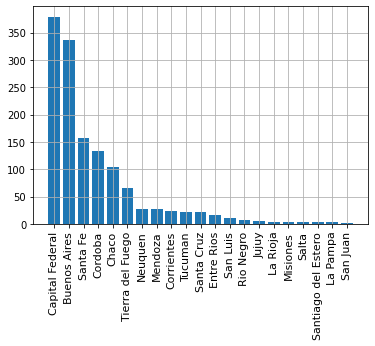

Provincia
Capital Federal        379
Buenos Aires           336
Santa Fe               157
Cordoba                134
Chaco                  104
Tierra del Fuego        65
Neuquen                 28
Mendoza                 27
Corrientes              23
Tucuman                 21
Santa Cruz              21
Entre Rios              16
San Luis                11
Rio Negro                8
Jujuy                    5
La Rioja                 4
Misiones                 4
Salta                    3
Santiago del Estero      3
La Pampa                 3
San Juan                 1
Name: total_cases, dtype: int64

In [7]:
has_cases = df_confirmed['total_cases'] > 0
provinces_with_cases = df_confirmed[has_cases].sort_values(by=['total_cases'], ascending=False)


plt.bar(provinces_with_cases.index,provinces_with_cases['total_cases'])
plt.xticks(provinces_with_cases.index, rotation='vertical', size=11)
plt.grid()
plt.show()

provinces_with_cases['total_cases']

# Deaths at the provinces/regions with infected people

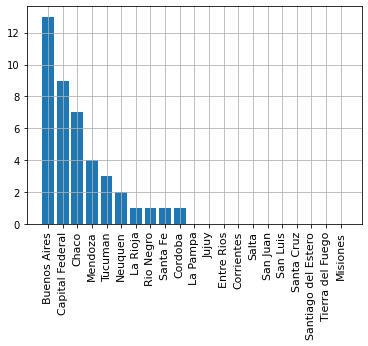

Provincia
Buenos Aires           13
Capital Federal         9
Chaco                   7
Mendoza                 4
Tucuman                 3
Neuquen                 2
La Rioja                1
Rio Negro               1
Santa Fe                1
Cordoba                 1
La Pampa                0
Jujuy                   0
Entre Rios              0
Corrientes              0
Salta                   0
San Juan                0
San Luis                0
Santa Cruz              0
Santiago del Estero     0
Tierra del Fuego        0
Misiones                0
Name: total_deaths, dtype: int64

In [8]:
deaths_of_infected_provinces = df_deaths[has_cases].sort_values(by=['total_deaths'], ascending=False)

plt.bar(deaths_of_infected_provinces.index,deaths_of_infected_provinces['total_deaths'])
plt.xticks(deaths_of_infected_provinces.index, rotation='vertical', size=11)
plt.grid()
plt.show()


deaths_of_infected_provinces['total_deaths']

# Mortality of provinces/regions with infected people

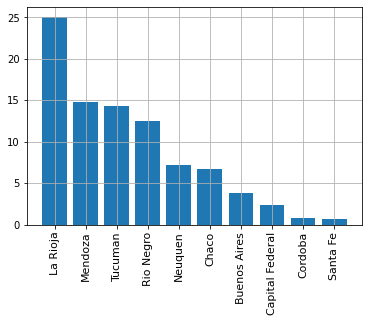

In [9]:
tmp_confirmed = provinces_with_cases.copy()
tmp_deaths = deaths_of_infected_provinces.copy()
tmp_confirmed.columns =  ['conf ' + col_name for col_name in tmp_confirmed.columns]
tmp_deaths.columns =  ['death ' + col_name for col_name in tmp_deaths.columns]
df_confirmed_and_deaths = pd.concat([tmp_confirmed, tmp_deaths], axis=1, join='inner')

df_confirmed_and_deaths['% death'] = (df_confirmed_and_deaths['death total_deaths'] / df_confirmed_and_deaths['conf total_cases']) * 100 
df_confirmed_and_deaths.sort_values(by=['% death'], ascending=False, inplace = True)

has_deaths_percentage = df_confirmed_and_deaths['% death'] > 0
provinces_with_deaths_percentage = df_confirmed_and_deaths[has_deaths_percentage] 

plt.bar(provinces_with_deaths_percentage.index,provinces_with_deaths_percentage['% death'])
plt.xticks(provinces_with_deaths_percentage.index, rotation='vertical', size=11)
plt.grid()
plt.show()


# Daily contagion and death curve

/home/facundo/Escritorio/covid/analisis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


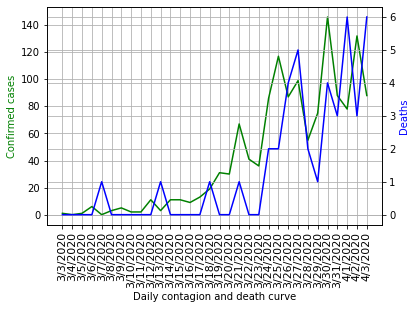

In [15]:
df_confirmed_transposed = df_confirmed.drop('total_cases',axis=1).transpose()
df_deaths_transposed = df_deaths.drop('total_deaths',axis=1).transpose()
df_deaths_transposed['total_deaths'] = df_deaths_transposed.sum(axis = 1)
df_confirmed_transposed['total_cases'] = df_confirmed_transposed.sum(axis = 1)


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_confirmed_transposed.index, df_confirmed_transposed['total_cases'], color='g')
ax2.plot(df_deaths_transposed.index, df_deaths_transposed['total_deaths'], color='b')

ax1.set_xlabel('Daily contagion and death curve')
ax1.set_ylabel('Confirmed cases', color='g')
ax2.set_ylabel('Deaths', color='b')
ax1.set_xticklabels(df_confirmed_transposed.index, rotation='vertical', size=11)

ax1.grid()
ax2.grid()
fig.show()


In [ ]:
#Evolutive contagion and death curve, A.K.A -

/home/facundo/Escritorio/covid/analisis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


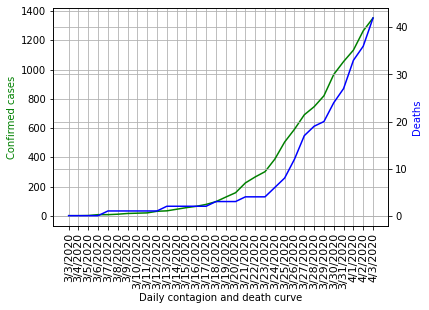

In [11]:
df_confirmed_transposed['evolutive_cases'] = df_confirmed_transposed['total_cases'].cumsum()
df_deaths_transposed['evolutive_deaths'] = df_deaths_transposed['total_deaths'].cumsum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_confirmed_transposed.index, df_confirmed_transposed['evolutive_cases'], color='g')
ax2.plot(df_deaths_transposed.index, df_deaths_transposed['evolutive_deaths'], color='b')

ax1.set_xlabel('Daily contagion and death curve')
ax1.set_ylabel('Confirmed cases', color='g')
ax2.set_ylabel('Deaths', color='b')
ax1.set_xticklabels(df_confirmed_transposed.index, rotation='vertical', size=11)

ax1.grid()
ax2.grid()
fig.show()
